In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [67]:
names = ['Date','Time','Measurement','Value']
df = pd.read_csv('Diabetes-Data/data-08', sep='\t', header=None, names=names)
df

,Date,Time,Measurement,Value
0,07-31-1990,12:09,60,100
1,07-31-1990,17:28,62,190
2,07-31-1990,18:41,62,124
3,08-01-1990,05:58,58,222
4,08-01-1990,12:57,60,339
...,...,...,...,...
172,09-04-1990,12:15,57,160
173,09-04-1990,12:16,57,139
174,09-04-1990,15:04,61,291
175,09-04-1990,19:06,62,124


In [77]:
arr_meas = []

for index, row in enumerate(df.iterrows()):
    currMeas = row[1]['Measurement']
    if (currMeas == 48 or (currMeas>=57 and currMeas<=64)):
    #if(currMeas == 60):
        currTime = datetime.strptime(row[1]['Time'], '%H:%M').time()
        currTimeFloat = currTime.hour + currTime.minute / 60.0
        arr_meas.append({'Time':currTimeFloat, 'Glucose':row[1]['Value']})

In [78]:
df_gc = pd.DataFrame(arr_meas)
df_gc

,Time,Glucose
0,12.150000,100
1,17.466667,190
2,18.683333,124
3,5.966667,222
4,12.950000,339
...,...,...
134,12.250000,160
135,12.266667,139
136,15.066667,291
137,19.100000,124


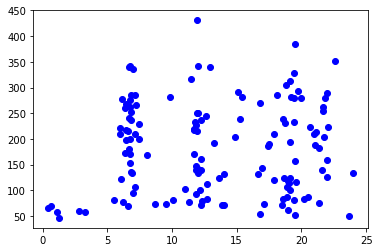

In [79]:
plt.plot(df_gc['Time'], df_gc['Glucose'], 'bo')
plt.show()

In [86]:
X = pd.DataFrame(df_gc.loc[:,'Time'])
y = pd.DataFrame(df_gc.loc[:,'Glucose'])

#Default size of trainData = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [87]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print (accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.0


/home/saul/actividad1_aprendizaje/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
